Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB
None

Dataset Shape: (1000, 14)

First few rows of the dataset:
  checkin_ac

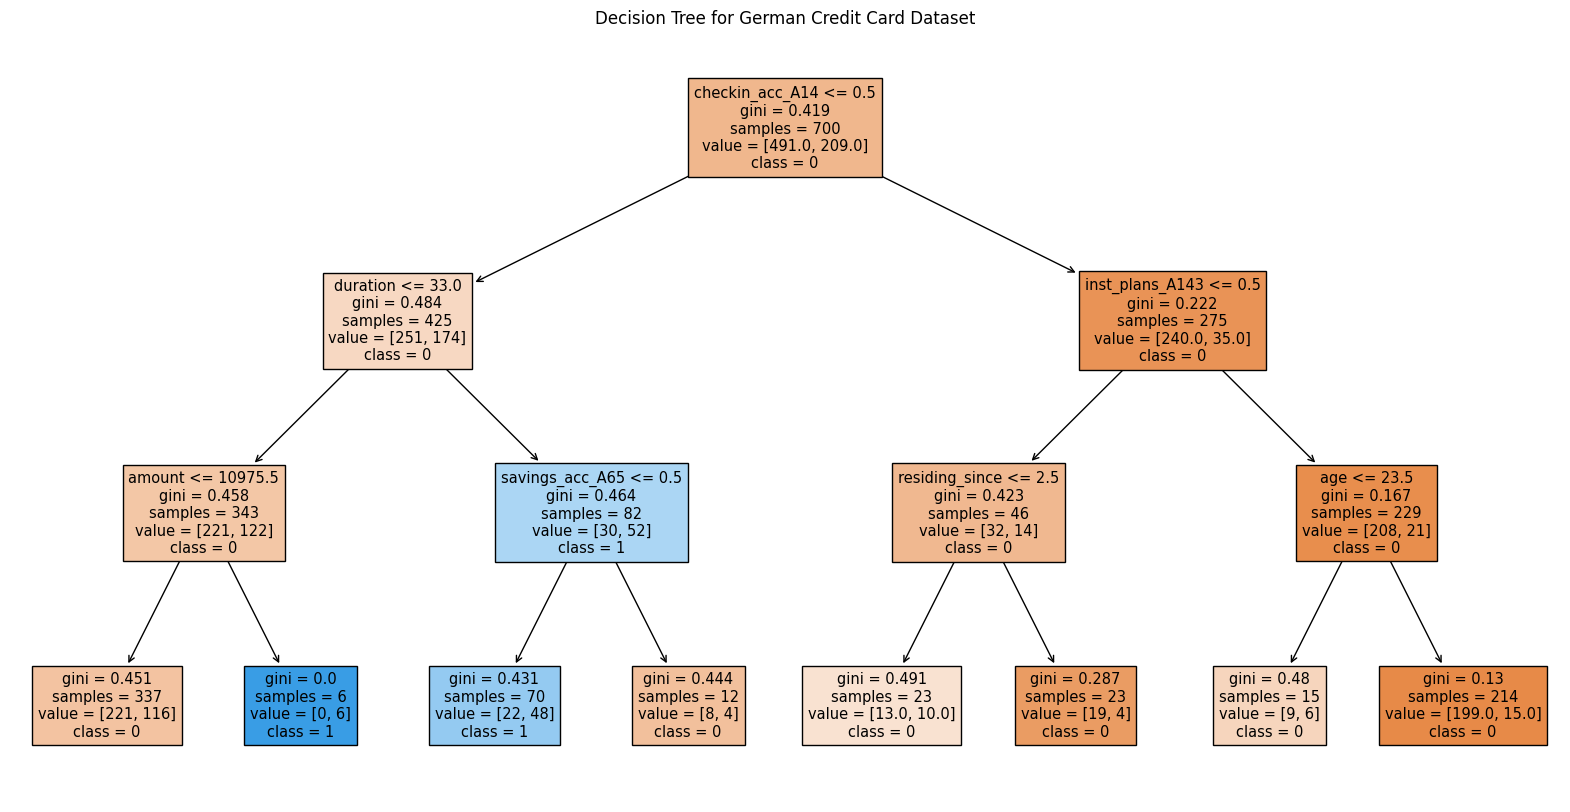

In [36]:
# DECISION TREE

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

# Load the dataset
df = pd.read_csv("German_Credit_Card_Dataset.csv")

# Display basic information and shape of the dataset
print("Dataset Info:")
print(df.info())
print("\nDataset Shape:", df.shape)

# Display first few rows
print("\nFirst few rows of the dataset:")
print(df.head())

# Display a subset of rows and columns
print("\nRows 0-4 and columns 0-6:")
print(df.iloc[0:5, 0:7])

# Checking unique values in 'checkin_acc' column
print("\nUnique values in 'checkin_acc':", df['checkin_acc'].unique())

# Prepare features and encode categorical variables
X_features = list(df.columns)
X_features.remove('status')  # Remove target variable from features list

# One-hot encode categorical variables
encoded_df = pd.get_dummies(df[X_features], drop_first=True)
print("\nEncoded feature columns:", list(encoded_df.columns))

# Define features (X) and target variable (Y)
x = encoded_df
Y = df['status']

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree model
clf = DecisionTreeClassifier(criterion='gini', max_depth=3)
clf.fit(X_train, Y_train)

# Make predictions on the test set
pred_y = clf.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:\n", metrics.confusion_matrix(Y_test, pred_y))
print("Accuracy:", metrics.accuracy_score(Y_test, pred_y))
print("F1 Score:", metrics.f1_score(Y_test, pred_y))

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=encoded_df.columns, class_names=['0', '1'], filled=True)
plt.title("Decision Tree for German Credit Card Dataset")
plt.show()
